# Physics-Based Deep Learning

 _"Physics-Based Deep Learning"_ is the field of methods with combinations of physical modeling and
deep learning (DL) techniques. The general direction of PBDL represents a very active and quickly growing field of research. 

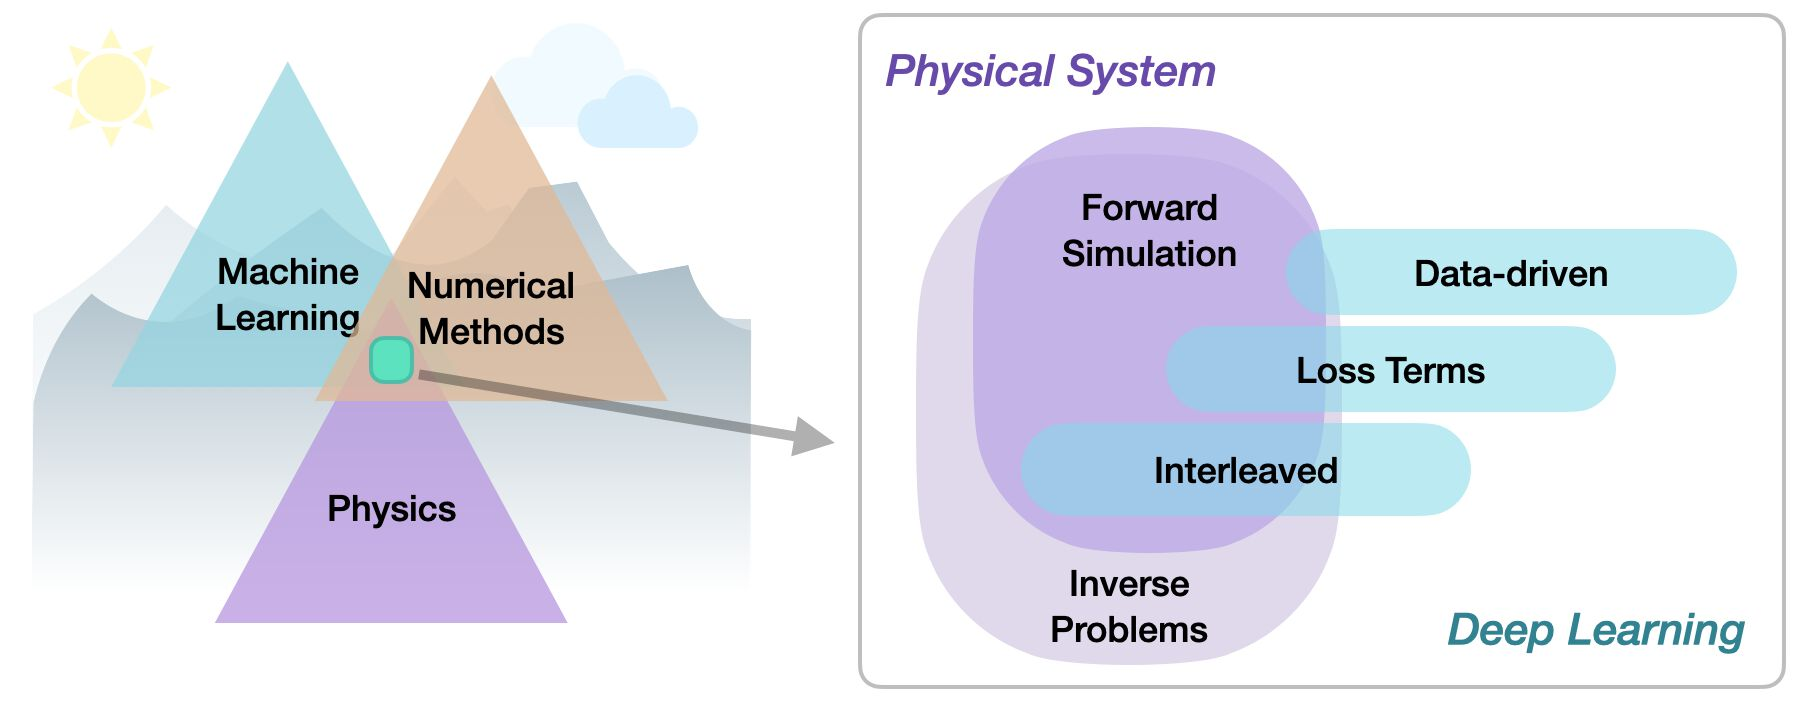

Within this area, we can distinguish a variety of different physics-based
approaches, from targeting designs, constraints, combined methods, and
optimizations to applications. 

More specifically, all approaches either target
_forward_ simulations (predicting state or temporal evolution) or _inverse_
problems (e.g., obtaining a parametrization for a physical system from
observations). 

Apart from forward or inverse, the type of integration between learning
and physics gives a means for categorizing different methods:

- _Data-driven_: the data is produced by a physical system (real or simulated),
  but no further interaction exists. 

- _Loss-terms_: the physical dynamics (or parts thereof) are encoded in the
  loss function, typically in the form of differentiable operations. The
  learning process can repeatedly evaluate the loss, and usually receives
  gradients from a PDE-based formulation.

- _Interleaved_: the full physical simulation is interleaved and combined with
  an output from a deep neural network; this requires a fully differentiable
  simulator and represents the tightest coupling between the physical system and
  the learning process. Interleaved approaches are especially important for
  temporal evolutions, where they can yield an estimate of future behavior of the
  dynamics.

Thus, methods can be roughly categorized in terms of forward versus inverse
solve, and how tightly the physical model is integrated into the optimization loop that trains the deep neural network. Here, especially approaches that leverage _differentiable physics_ allow for very tight integration of deep learning and numerical simulations.


## Learning to model experimental data

Let’s look at one way machine learning can be used for scientific research. Imagine we are given some experimental data points that come from some unknown physical phenomenon, e.g. the orange points in the animation below.

A common scientific task is to find a model which is able to accurately predict new experimental measurements given this data.

![image.png](images/Lesson_09_nn.gif)

One popular way of doing this using machine learning is to use a neural network. Given the location of a data point as input (denoted x), a neural network can be used to output a prediction of its value (denoted u), as shown in the figure below:

![image.png](images/Lesson_09_nn-768x420.png)

To learn a model, we try to tune the network’s free parameters (denoted by the $\theta$ in the figure above) so that the network’s predictions closely match the available experimental data. This is usually done by minimising the mean-squared-error between its predictions and the training points;

$$\mathrm{min} \frac{1}{N} \sum^{N}_{i} (u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) )^2$$

The result of training such a neural network using the experimental data above is shown in the animation.

### The “naivety” of purely data-driven approaches
The problem is, using a purely data-driven approach like this can have significant downsides. Have a look at the actual values of the unknown physical process used to generate the experimental data in the animation above (grey line).

You can see that whilst the neural network accurately models the physical process within the vicinity of the experimental data, it fails to generalise away from this training data. By only relying on the data, one could argue it hasn’t truly “understood” the scientific problem.

So researchers are now looking for ways to include prior scientific knowledge into our machine learning workflows, in the blossoming field of scientific machine learning (SciML).

## Physics-informed neural networks

The idea is very simple: add the known differential equations directly into the loss function when training the neural network.

This is done by sampling a set of input training locations ($\{x_{j}\}$) and passing them through the network. Next gradients of the network’s output with respect to its input are computed at these locations (which are typically analytically available for most neural networks, and can be easily computed using autodifferentiation). Finally, the residual of the underlying differential equation is computed using these gradients, and added as an extra term in the loss function.


  


![pinn](images/Lesson_09_pinn-768x304.png)

The problem above is a classic physics problem, and we know that the underlying physics can be described by the following differential equation:

  $$m\frac{d^2u}{dx^2} + \mu \frac{du}{dx} + k u = 0$$

This amounts to using the following loss function to train the network:

$$
  \mathrm{min}\frac{1}{N} \sum^{N}_{i} (u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) )^2 \\+\frac{1}{M} \sum^{M}_{j} \left( \left[ m\frac{d^2}{dx^2} + \mu \frac{d}{dx} + k \right] u_{\mathrm{NN}}(x_{j};\theta)  \right)^2
$$

We can see that the additional “physics loss” in the loss function tries to ensure that the solution learned by the network is consistent with the known physics.

![pinn_gif](images/Lesson_09_pinn.gif)

# Examples of inverse problems in imaging

We face inverse problems every time we are reconstructing an unknown signal, image, or multidimensional volume from observations. 

The observations are obtained from the unknown data by a forward process, which is typically non-invertible.

$$ y = \mathcal{A}(x^*) + \epsilon $$

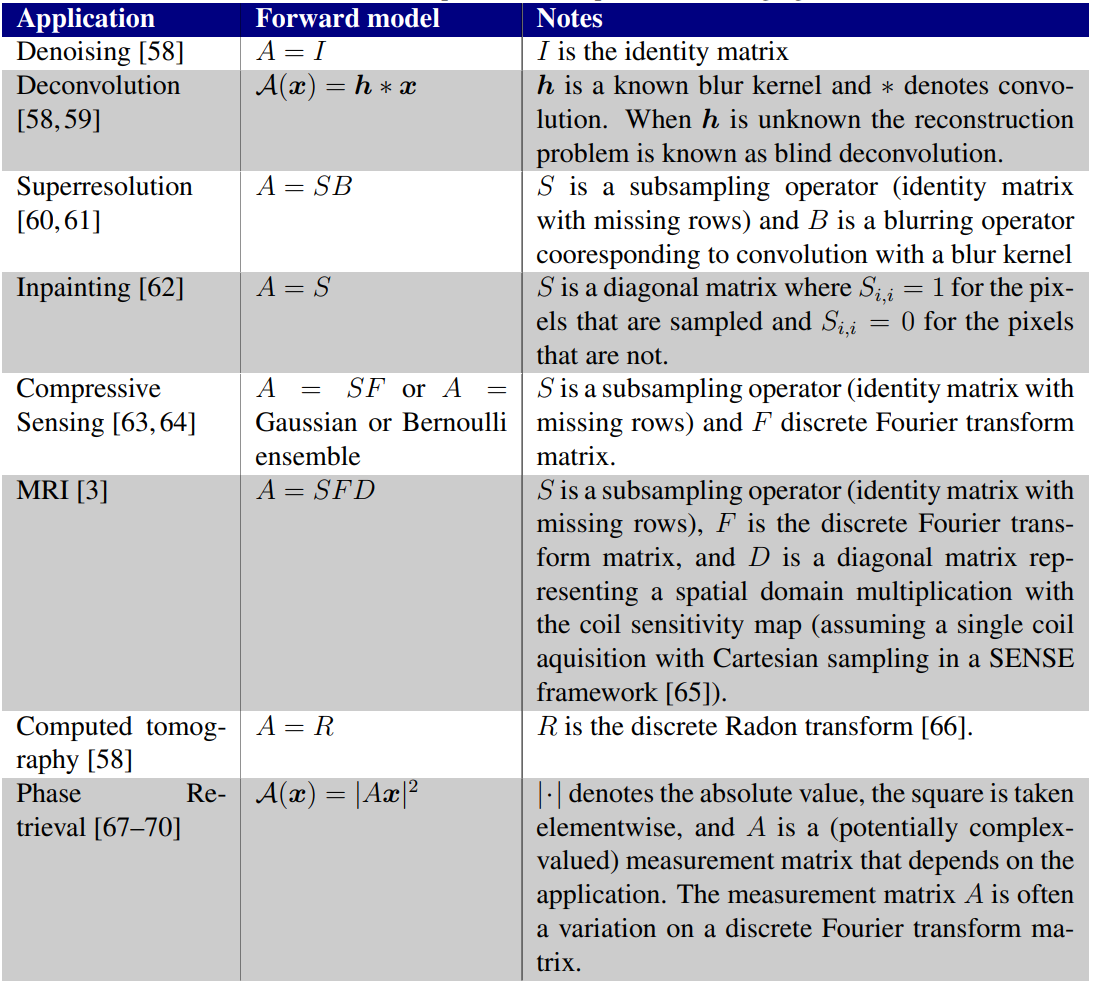

### Major categories of methods learning to solve inverse problems

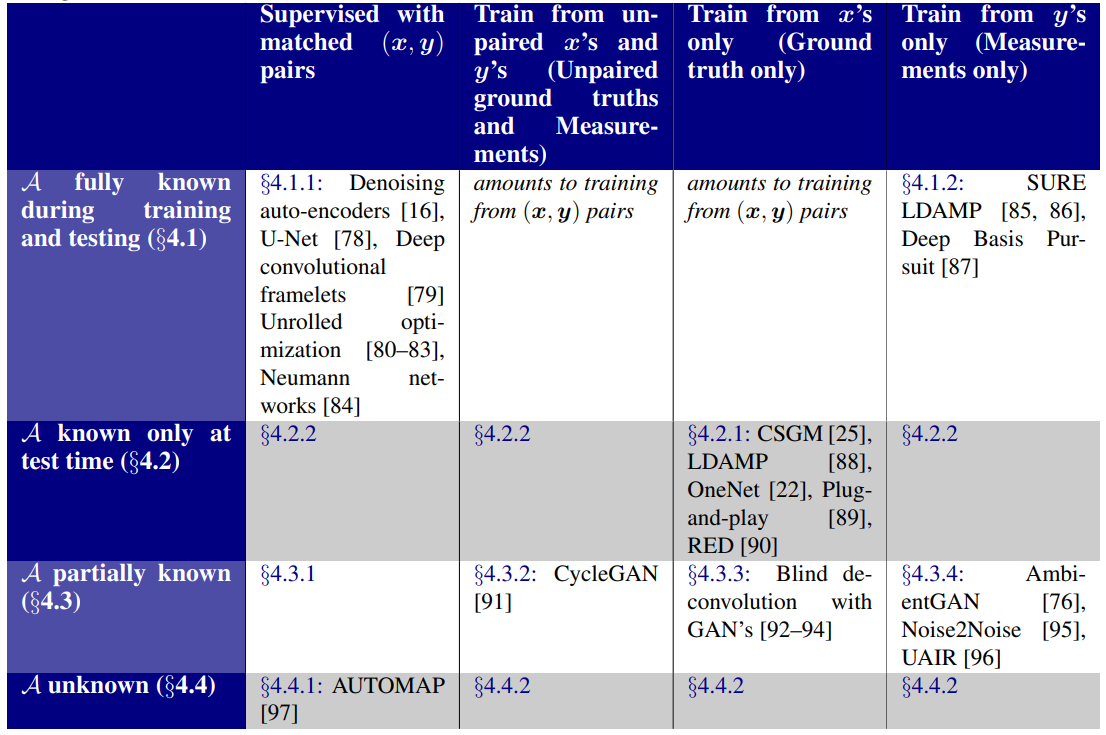

## Train from measurements only

Learning from measurements alone is a hard task, which is further compounded by the difficulty
of only having partial knowledge of the forward model. In order to tackle this problem, it is commonly assumed that the forward operator has an underlying distribution, and we have knowledge of its statistics. 

There are two popular ways of solving this problem: one is a “supervised” approach,
and another is via adversarial training. 

Here, we will explore the supervised approach.


### Noise2Noise

This method learns a neural network that accepts noisy measurements  as input and produces clean samples as output. The training of the network is reminiscent of
supervised training, except it does not actually need ground truth. In order to do this, Noise2Noise assumes that:

- The samples satisfy $ \mathrm{E}[\~x|y] = x^* $, where $\~x$ is a noisy version of $x^*$.

This allows the network to be trained from contaminated samples $\~x$, without access to the clean ground truth. In theory this should require multiple $\~x$ for each $x^*$, but  in their article Lehtinen et al. observe that one sample suffices. 

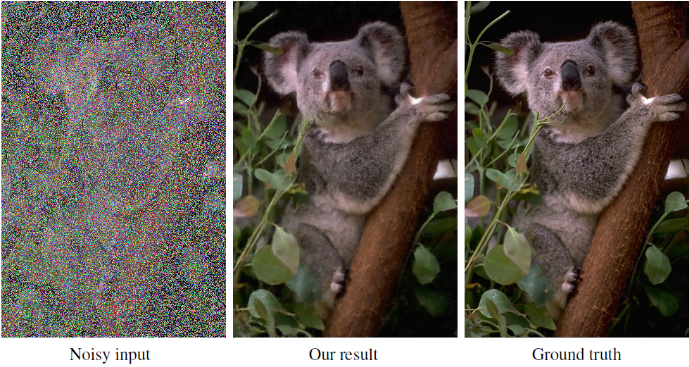

## Other examples

### Deep learning for fast spatially varying deconvolution

Deconvolution can be used to obtain sharp images or volumes from blurry or encoded measurements in imaging systems. 

Given knowledge of the system’s transfer function over the field of view, a reconstruction algorithm can be used to recover a clear image or volume.

In realistic systems, the transfer function varies laterally and axially across the field of view due to aberrations or design. Shift-varying deconvolution models can be used, but they are often slow and computationally intensive.

Using multiple differentiable Wiener filters paired with a convolutional neural network to incorporate spatial variance allows for fast 2D and 3D reconstructions and outperforms existing deep-learning-based methods.

<img src="images/Lesson_09_deconv.jpg" width="1200">

### Physics-informed filtering of in-vivo 4D-flow magnetic resonance imaging data of blood flow in a porcine descending aorta

Physics-informed neural network (PINN) models can be used to denoise and reconstruct clinical magnetic resonance imaging (MRI) data of blood velocity, while constraining this reconstruction to respect the underlying physical laws of momentum and mass conservation, as described by the incompressible Navier–Stokes equations. 

Moreover, a trained PINN model has the potential to aid the automatic segmentation of the arterial wall geometry and to infer important biomarkers such as blood pressure and wall shear stresses.

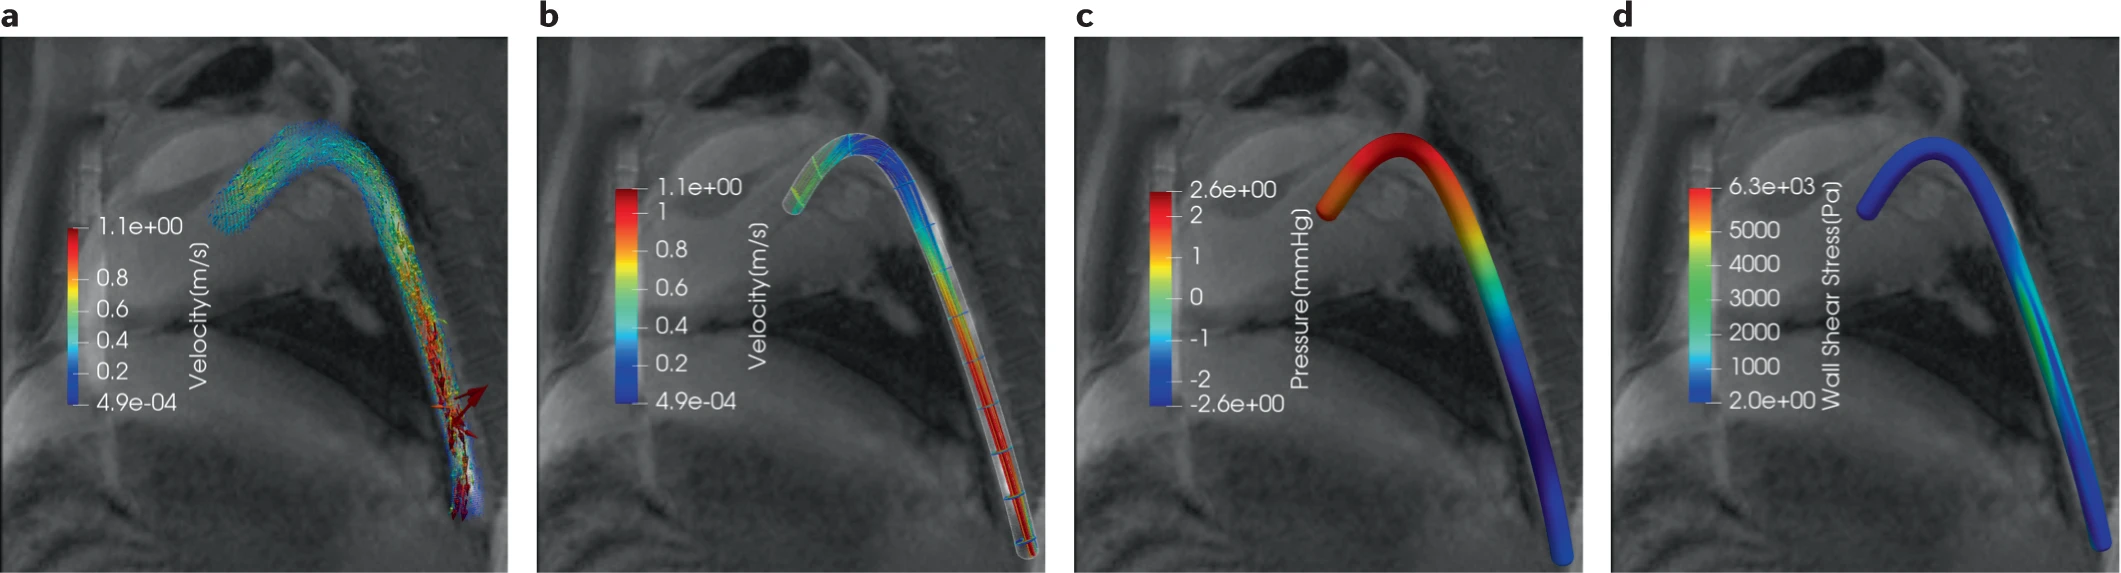